In [2]:
import pandas as pd
import numpy as np
import glob

In [14]:
dfs = []
for path in glob.glob('E2E-DATASET/**/**/results.csv'):
    dfs.append(pd.read_csv(path, index_col=0))
dfs.append(pd.read_csv('DEFECTS4J/results/Lang/testRemoveAllCharArrayNegativeIndex/results.csv', index_col=0))
dfs.append(pd.read_csv('DEFECTS4J/results/Math/testDerivativesHighOrder/results.csv', index_col=0))
dfs.append(pd.read_csv('DEFECTS4J/results/Time/test_DateTime_minusHour_Guatemata_Autumn/results.csv', index_col=0))
df = pd.concat(dfs)

In [15]:
df.groupby(['app', 'name']).mean()

time       maxMem  \
app      name                                                              
Lang     testRemoveAllCharArrayNegativeIndex         0.0043    13.500000   
Math     testDerivativesHighOrder                    0.0167    22.700000   
Time     test_DateTime_minusHour_Guatemata_Autumn    0.0150    14.700000   
WebApp-1 checkCreateList                           189.8339   819.942578   
WebApp-2 checkCreateCourse                         170.0784  1045.920312   
         checkDownload                             170.8833  1044.916016   
         checkShowProfile                          157.6242  1063.476562   
WebApp-3 checkShowAdminPage                        206.7542   791.571094   

                                                       maxCpu  
app      name                                                  
Lang     testRemoveAllCharArrayNegativeIndex         0.508333  
Math     testDerivativesHighOrder                    0.169522  
Time     test_DateTime_minusHour_Guatemata_Autumn    0.255983  
WebApp-1 checkCreateList                           364.994653  
WebApp-2 checkCreateCourse                         355.395339  
         checkDownload                             307.334825  
         checkShowProfile                          344.215134  
WebApp-3 checkShowAdminPage                        306.906717

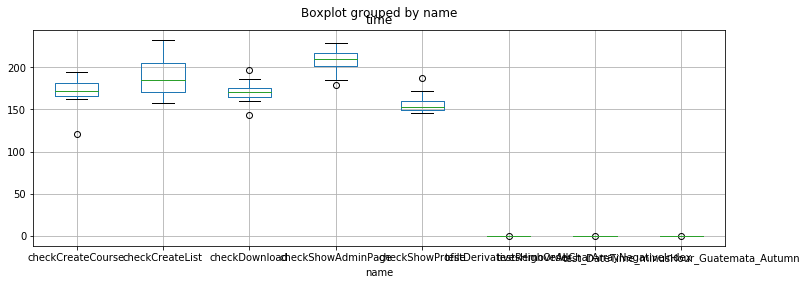

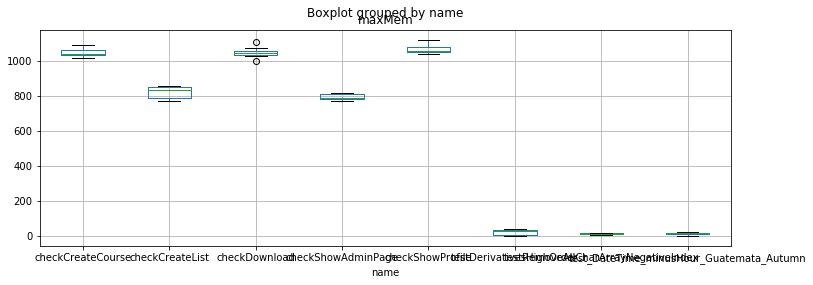

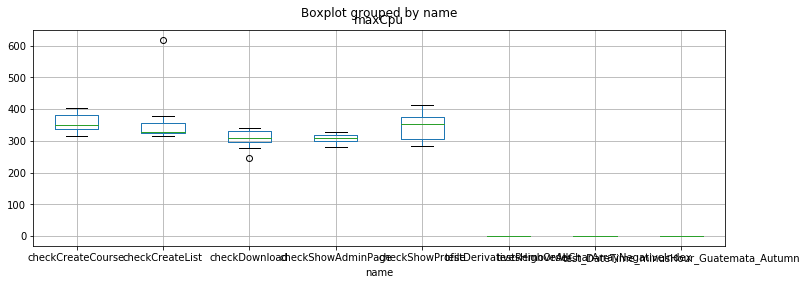

In [6]:
boxplot = df.boxplot(column=['time'], by='name', figsize=(12,4))
boxplot
boxplot2 = df.boxplot(column=['maxMem'], by='name', figsize=(12,4))
boxplot2
boxplot3 = df.boxplot(column=['maxCpu'], by='name', figsize=(12,4))
boxplot3

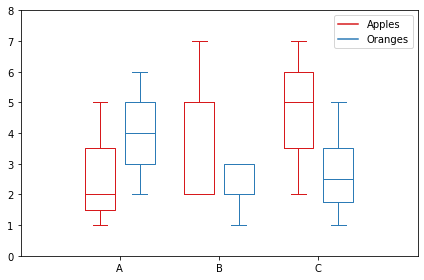

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.png')